In [18]:
import numpy as np
import matplotlib.pyplot as plt

Omega=5
patrones=1
beta=1/1.1
gm=1
guardado=10
T=20
steps=10000
h=1.0/steps
filas=500
columnas=2

def RK4(f,t0,X0,h):

    K1=np.zeros(X0.shape[0])
    K2=np.zeros(X0.shape[0])
    K3=np.zeros(X0.shape[0])
    K4=np.zeros(X0.shape[0])
    
    Y=X0.copy()
    t=t0

    while(True):
        K1=h*f(t, Y)
        K2=h*f(t+h/2, Y+K1/2)
        K3=h*f(t+h/2, Y+K2/2)
        K4=h*f(t+h, Y+K3)

        t+=h
        Y+=(K1+2.0*K2+2.0*K3+K4)/6.0

        yield (t,Y)

def f(t,m):
    dmz=2.0*Omega*m[1]+np.tanh(m[0]*beta)-gm*m[0]
    dmy=-2.0*Omega*m[0]-gm*m[1]/2.0
    return np.array([dmz,dmy])

#Total de lineas que se van a utilizar para representar el fichero

rng=np.random.default_rng(8942435344)


sz0=rng.uniform(-1,1,columnas)
sy0=rng.uniform(-1,1,columnas)

#Para resolver las ecuaciones lo hacemos mediante una expansión de Taylor
mz=np.zeros((int(T/(guardado*h)),sz0.size),np.float128)
my=np.zeros((int(T/(guardado*h)),sz0.size),np.float128)


contador:int=0



try:
    for w in range(sz0.size):
        sz=sz0[w]
        sy=sy0[w]
        iter=RK4(f,0.0,np.array([sz,sy]),h)
        for i in range(int(T/h)):

            t,m=iter.__next__()
            
            if(i%guardado==0):
                
                mz[int(i/guardado),w]=m[0]
                my[int(i/guardado),w]=m[1]
                
                
                if(np.abs(mz[int(i/guardado),w])>1.1 or np.abs(my[int(i/guardado),w])>1.1):
                    raise
except:
    print("Se han roto las condiciones de contorno")
    raise





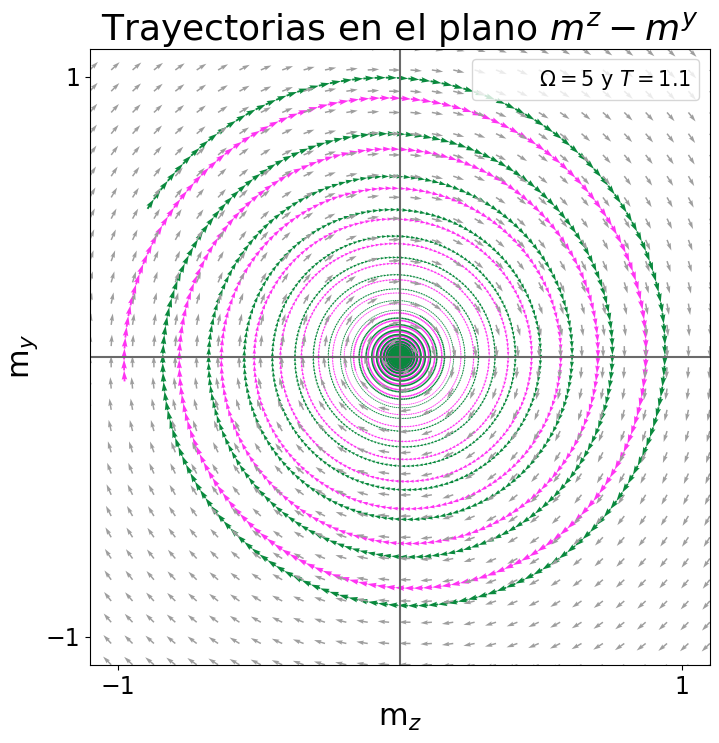

In [19]:


qbits=" el límite termodinámico "

mzm=mz
mym=my
mzT=mz
myT=my

total:int=mz.shape[0]
inicio=0

#Necesitamos generar ahora a los vectores que nos van a llevar  de un estado a otro para ello escogemos solo 10 puntos

filas=5000

#Numero de divisines que cogemos para representar
particion:int=int(total/filas)


#Sacmos los puntos que vamos a representar
X=np.zeros((filas,columnas))
Y=np.zeros((filas,columnas))
Xm=np.zeros((filas,columnas))
Ym=np.zeros((filas,columnas))

for i in range(filas):
    X[i]=mz[particion*i,:]
    Y[i]=my[particion*i,:]
    Xm[i]=mzm[particion*i,:]
    Ym[i]=mym[particion*i,:]

#Calculamos los vectores directores de la red
u=X[1:filas]-X[0:filas-1]
v=Y[1:filas]-Y[0:filas-1]
um=Xm[1:filas]-Xm[0:filas-1]
vm=Ym[1:filas]-Ym[0:filas-1]

#Gradicamos el campo vectorial

plt.figure(1,figsize=(8,8))



colores=["#ff33f3","#09893d","#9eae00","#ff5733","#a833ff","#33f6ff","#8a7f2c","#8a2c2c","#502eac","#db2700","#e0a600","#000000","#f96fde","#b50092","#2eaca4","#aca82e","#2e5aac"]

for i in range(columnas):
    plt.quiver(X[0:filas-1,i],Y[0:filas-1,i],u[:,i],v[:,i],scale_units="xy",angles='xy',scale=1,color=colores[i],width=0.003)
    


plt.xlabel(r"m$_{z}$",fontsize=22)
plt.ylabel(r"m$_{y}$",fontsize=22)

plt.title(r"Trayectorias en el plano $m^z-m^y$",fontsize=26)

plt.axvline(0.0,color="#6a6a6a")
plt.axhline(0.0,color="#6a6a6a")


ylim=1.1
xlim=1.1


#plt.rcParams.update({'legend.fontsize': 10})

plt.xlim(-ylim,ylim)
plt.ylim(-xlim,xlim)

X,Y = np.meshgrid(np.linspace(-xlim,xlim,30),np.linspace(-ylim,ylim,30))
#Campo de direcciones
Fv=lambda mz,my:2.0*Omega*my+np.tanh(mz*beta)-gm*mz
Fw=lambda mz,my:-2.0*Omega*mz-gm*my/2.0

xlim=1.0
ylim=1.0

plt.plot([0,0],[0,0],label="$\Omega="+str(Omega)+"$ y $T="+str(1/beta)+"$",linewidth=0.0)
plt.legend(loc="upper right",fontsize=15)

if((1+8*Omega**2)<beta):
    plt.plot(1/(1+8*Omega**2),-4*Omega/(1+8*Omega**2),linewidth=0.0,markersize=10.0,marker="o",color="r")
    plt.plot(-1/(1+8*Omega**2),4*Omega/(1+8*Omega**2),linewidth=0.0,markersize=10.0,marker="o",color="r")

FVect=Fv(X,Y)
Fwect=Fw(X,Y)

plt.xticks([-1,1],fontsize=17)
plt.yticks([-1,1],fontsize=17)

L=np.sqrt(FVect**2+Fwect**2)
plt.quiver(X,Y,FVect/L,Fwect/L, color='#9e9e9e')

plt.savefig("2diagrama_de_fase_omega_"+str(Omega)+"_beta_"+str(beta)+".png",format="png")

(-1.1, 1.1)

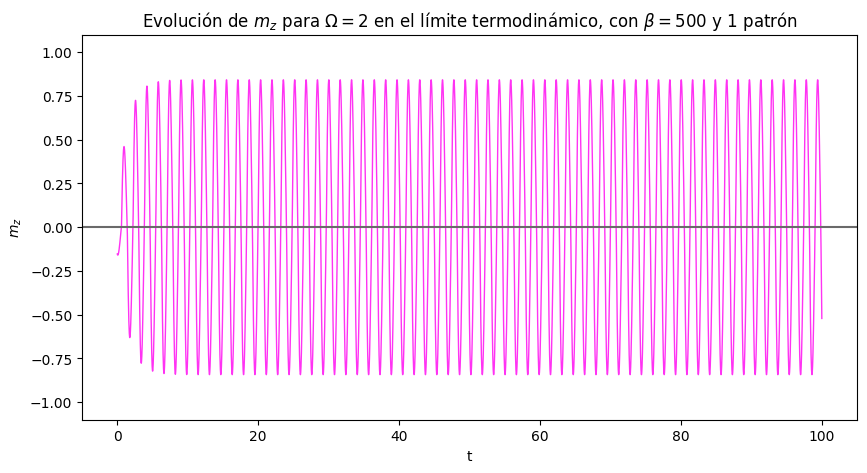

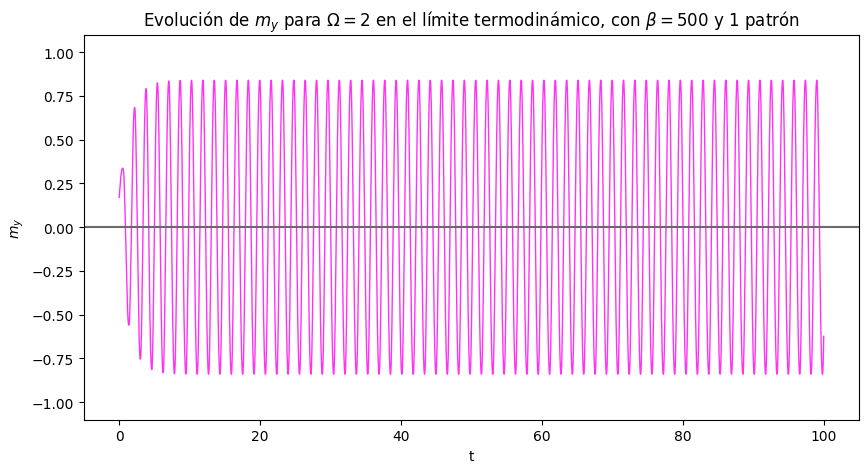

In [3]:
#Hacemos gráficas para estudiar la evolución temporal de la magenetización en el tiempo
t=np.arange(10*inicio,10*total,10)/10000
plt.figure(7,figsize=(10,5))
plt.title(r"Evolución de $m_{z}$ para $\Omega="+str(Omega)+"$ en el límite termodinámico, con $β="+str(beta)+"$ y "+str(patrones)+" patrón",fontsize="large")

plt.xlabel(r"t")
plt.ylabel(r"$m_{z}$")

for i in range(columnas):
    plt.plot(t,mzT[inicio:total,i],color=colores[i],linewidth=1.0)
plt.axhline(0.0,color="#6a6a6a")
plt.ylim(-1.1,1.1)

plt.figure(6,figsize=(10,5))

plt.title(r"Evolución de $m_{y}$ para $\Omega="+str(Omega)+"$ en el límite termodinámico, con $β="+str(beta)+"$ y "+str(patrones)+" patrón",fontsize="large")


plt.xlabel(r"t")
plt.ylabel(r"$m_{y}$")

for i in range(columnas):
    plt.plot(t,myT[inicio:total,i],color=colores[i],linewidth=1.0)
plt.axhline(0.0,color="#6a6a6a")
plt.ylim(-1.1,1.1)


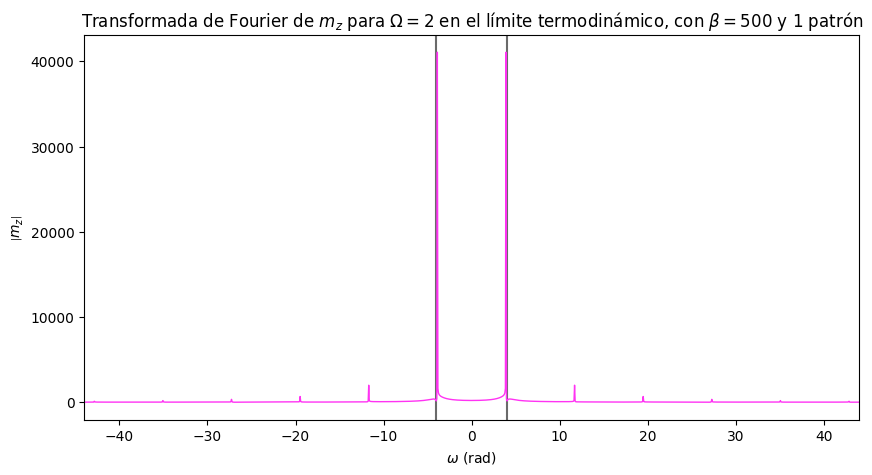

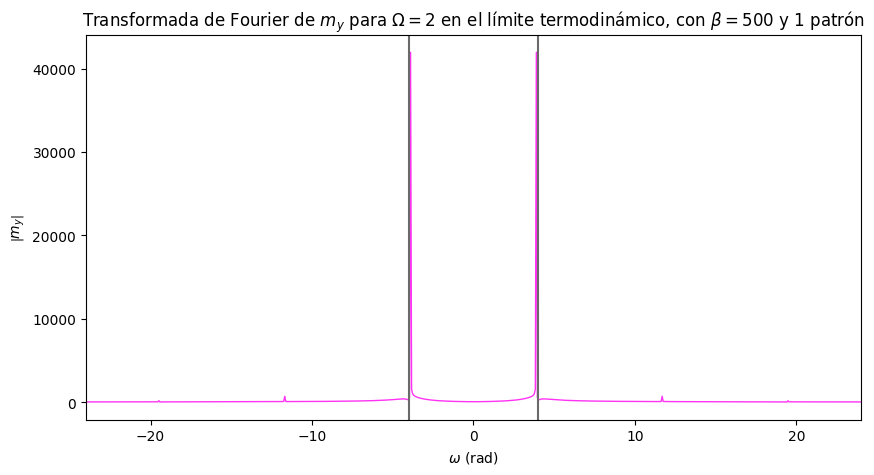

In [5]:
#Hacemos la transformada de Fourier
MzT=np.fft.fft(mzT,axis=0)
MyT=np.fft.fft(myT,axis=0)
Freq=np.fft.fftshift(np.fft.fftfreq(t.size,t[1]-t[0]))



plt.figure(8,figsize=(10,5))
plt.title(r"Transformada de Fourier de $m_{z}$ para $\Omega="+str(Omega)+"$ en el límite termodinámico, con $β="+str(beta)+"$ y "+str(patrones)+" patrón",fontsize="large")

plt.axvline(2.0*Omega,color="#6a6a6a")
plt.axvline(-2.0*Omega,color="#6a6a6a")

plt.xlabel(r"$\omega$ (rad)")
plt.ylabel(r"$\left|m_{z}\right|$")

plt.xlim(-40-2*Omega,40+2*Omega)

for i in range(columnas):
    plt.plot(2*np.pi*Freq,np.abs(np.fft.fftshift(MzT[inicio:total,i])),color=colores[i],linewidth=1.0)





plt.figure(9,figsize=(10,5))

plt.title(r"Transformada de Fourier de $m_{y}$ para $\Omega="+str(Omega)+"$ en el límite termodinámico, con $β="+str(beta)+"$ y "+str(patrones)+" patrón",fontsize="large")
plt.xlim(-20-2*Omega,20+2*Omega)

plt.xlabel(r"$\omega$ (rad)")
plt.ylabel(r"$\left|m_{y}\right|$")

for i in range(columnas):
    plt.plot(2*np.pi*Freq,np.abs(np.fft.fftshift(MyT[inicio:total,i])),color=colores[i],linewidth=1.0)

plt.axvline(2.0*Omega,color="#6a6a6a")
plt.axvline(-2.0*Omega,color="#6a6a6a")


np.savetxt("TF.dat",np.abs(np.fft.fftshift(MzT[inicio:total,i])))
np.savetxt("Freq.dat",2*np.pi*Freq)